In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# [Previous helper functions remain unchanged]
def Ke_Vancomycin(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)
    Vanco_CL = (60*eCCr)/(1000*1.08)  # l/hr
    Kel = (Vanco_CL/V)  # hr-1
    return Kel

def Ke_Linezolid(sCr, Age, weight, V=50):
    CrCL = (140 - Age)*weight/(72*sCr)
    CL_linezolid = 5 + (CrCL * 0.4)
    Kel = CL_linezolid / V
    return Kel

def concentration(t, D, V, Ke, tau, start_time, end_time, dosing_times=None):
    conc = np.zeros_like(t)
    if dosing_times is None:
        dosing_times = np.arange(start_time, end_time, tau)
    
    for i, time_point in enumerate(t):
        if start_time <= time_point <= end_time:
            for dose_time in dosing_times:
                if time_point >= dose_time:
                    conc[i] += (D / V) * np.exp(-Ke * (time_point - dose_time))
    return conc


In [ ]:
import os
os.getcwd()
# Change the directory 
os.chdir("C:/Users/Jacob/Documents/Projects_Python/Antibiotic_Resistance_Models")
# Verify the change 
os.getcwd() 

## Key Features of the Model
Parameters:

CL (Clearance): Rate at which the drug is eliminated.
V (Volume of distribution): Space in which the drug distributes.
Dosing Regimen:

dose: 500 mg IV.
tau: Dosing interval of 12 hours.
Simulation covers 7 days (duration = 7 * 24 hours).
Simulation:

Drug is added at specified dosing intervals (if t % tau == 0).
Exponential decay simulates drug elimination.
Visualization:

Plot includes therapeutic and toxic thresholds for clinical interpretation.
Output
The plot shows vancomycin plasma concentration over 7 days with the characteristic peaks and troughs due to dosing and elimination.
You can adjust parameters like CL, V, or dose to simulate different scenarios.

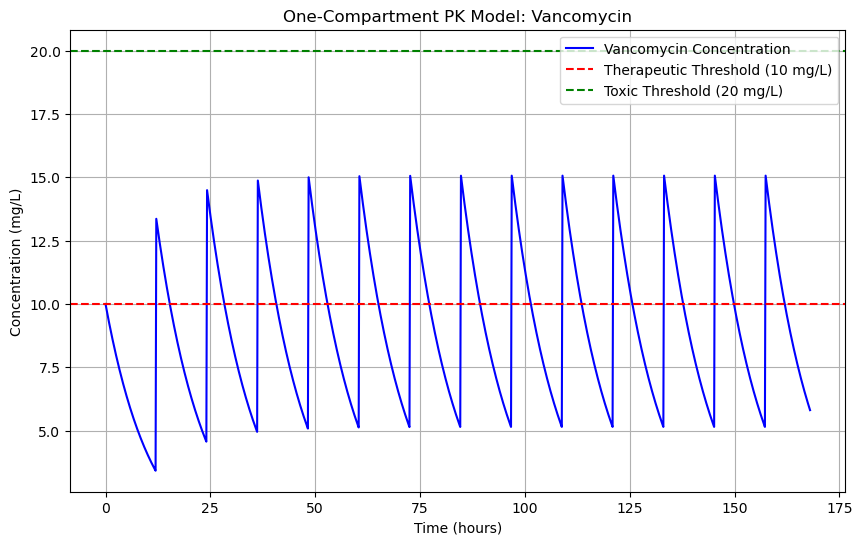

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
CL = 4.5  # Clearance (L/h)
V = 50    # Volume of distribution (L)
k10 = CL / V  # Elimination rate constant (1/h)

dose = 500  # Dose (mg)
tau = 12    # Dosing interval (h)
duration = 7 * 24  # Simulation time (hours)

# Define the time points
time_points = np.linspace(0, duration, 1000)

# Function to simulate one-compartment PK model with multiple doses
def simulate_pk(dose, tau, duration, time_points, CL, V):
    concentrations = []
    current_amount = 0.0
    last_dose_time = 0.0  # Time of the last dose
    
    for t in time_points:
        # Account for elimination from last time step
        if concentrations:
            dt = t - time_points[np.where(time_points == t)[0][0] - 1]  # Time difference
            current_amount = current_amount * np.exp(-k10 * dt)
        
        # Add dose at dosing times
        if (t >= last_dose_time + tau) or (t == 0):
            current_amount += dose
            last_dose_time = t
        
        # Calculate concentration
        concentration = current_amount / V
        concentrations.append(concentration)
    
    return np.array(concentrations)

# Simulate the model
concentrations = simulate_pk(dose, tau, duration, time_points, CL, V)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, concentrations, label="Vancomycin Concentration", color="blue")
plt.title("One-Compartment PK Model: Vancomycin")
plt.xlabel("Time (hours)")
plt.ylabel("Concentration (mg/L)")
plt.axhline(10, color='red', linestyle='--', label='Therapeutic Threshold (10 mg/L)')
plt.axhline(20, color='green', linestyle='--', label='Toxic Threshold (20 mg/L)')
plt.legend()
plt.grid()
plt.show()
